Loading packages

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scqubits as sq
import scipy.constants as const
import matplotlib.pyplot as plt

# Fluxonium

In [2]:
fluxonium_parameters= {
    'EJ':   10,
    'EC':   0.81,
    'EL':   0.369,
}

flux_array = np.linspace(-0.5, 0.5, 1001)

#Fluxonium definition
fluxonium = sq.Fluxonium(**fluxonium_parameters,flux =0,cutoff=40)

#Obtain energy levels and matrix elements
spectrum_data = fluxonium.get_matelements_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=flux_array,
    evals_count=6
)

# Obtain the energy levels.
evals_matrix = spectrum_data.energy_table

#Obtain the transition energies from the state 0, 1 and 2
transitions0 = evals_matrix - evals_matrix[:,0].reshape(-1,1)
transitions1 = evals_matrix - evals_matrix[:,1].reshape(-1,1)
transitions2 = evals_matrix - evals_matrix[:,2].reshape(-1,1)

# Erasing 'transition from i to i'
transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)
transitions2 = np.delete(transitions2,[0,1,2],axis=1)

#Obtain the matrix elements.
matrix_element = spectrum_data.matrixelem_table
transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

# Erasing 'matrix element from i to i'
transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)

Spectral data:   0%|          | 0/1001 [00:00<?, ?it/s]

## Plot energy transitions

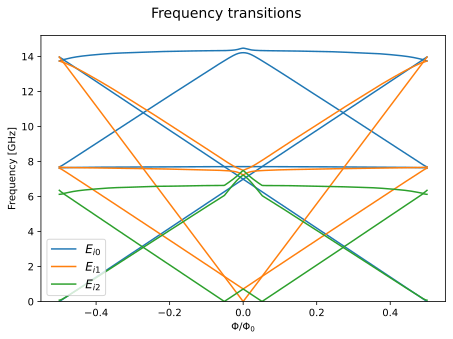

In [13]:
# %matplotlib widget #Uncomment this if you want to have a interactive image.

fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency transitions', fontsize = 14)
ax.plot(flux_array,transitions0,color='C0')
ax.plot(flux_array,transitions1,color='C1')
ax.plot(flux_array,transitions2,color='C2')

ax.plot([], [], color='C0', label=r'$E_{i0}$')
ax.plot([], [], color='C1', label=r'$E_{i1}$')
ax.plot([], [], color='C2', label=r'$E_{i2}$')
ax.set_ylim(bottom=0)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
ax.legend(fontsize = 12)
fig.tight_layout()
plt.show()

# Fluxonium + Resonator

In [13]:
fluxonium_parameters= {
    'EJ':   10,
    'EC':   1.81,
    'EL':   0.369,
}

EJ,EC,EL = fluxonium_parameters['EJ'], fluxonium_parameters['EC'], fluxonium_parameters['EL']

#Obtain the shared EL and the resonator EL from the fluxonium EL.
EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.137
EC_resonator = resonator_frequency**2/8/EL_resonator

# Define the dictionary for the fluxonium + resonator.
flux_res_dict = f"""
branches:
- ["JJ", 1,2, {EJ}, {EC}]
- ["L", 2,3, {EL_fluxonium}]
# Coupling inductance
- ["L", 1,3, {EL_shared}]
# JJA resonator
- ["L", 3,4, {EL_resonator}]
- ["C", 4,1, {EC_resonator}]
"""

fluxonium_resonator = sq.Circuit(
    input_string=flux_res_dict,
    from_file=None,
    ext_basis='harmonic'
)

flux1_array = np.linspace(-0.005,0.005,301)

spectrumData_fluxres = fluxonium_resonator.get_matelements_vs_paramvals(
    operator='θ2_operator',
    param_name='Φ1',
    param_vals=flux1_array,
    evals_count=10)

spectra_fluxres = spectrumData_fluxres.energy_table

transitions0 = spectra_fluxres - spectra_fluxres[:,0].reshape(-1,1)
transitions1 = spectra_fluxres - spectra_fluxres[:,1].reshape(-1,1)
transitions2 = spectra_fluxres - spectra_fluxres[:,2].reshape(-1,1)

transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)
transitions2 = np.delete(transitions2,[0,1,2],axis=1)


matrix_element = spectrumData_fluxres.matrixelem_table
transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)


max0_matrix_elem = np.max(transition0_matrix_element)
max1_matrix_elem = np.max(transition1_matrix_element)
max2_matrix_elem = np.max(transition2_matrix_element)
max_val = max(max0_matrix_elem, max1_matrix_elem, max2_matrix_elem)

Spectral data:   0%|          | 0/301 [00:00<?, ?it/s]

In [17]:
fluxonium_resonator.sym_hamiltonian()

<IPython.core.display.Latex object>

## Plot energy levels

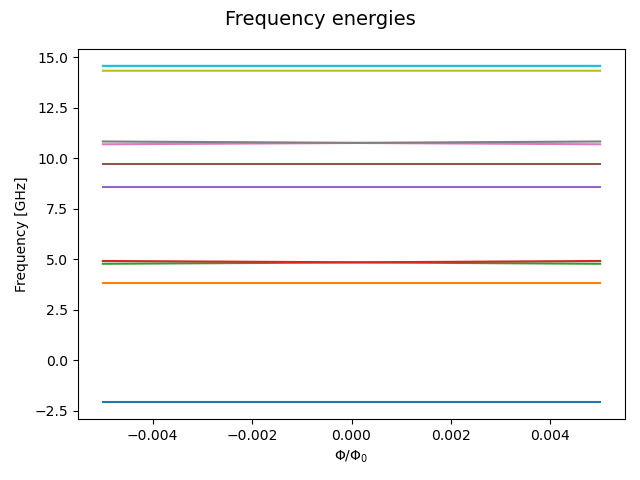

In [16]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline

fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

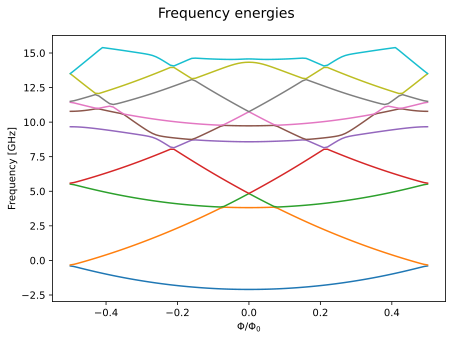

In [ ]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline

fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

## Dispersive shift

In [14]:
Eg0_1 = spectra_fluxres[:,0]
Eg1_1 = spectra_fluxres[:,1]

Ee0_1 = spectra_fluxres[:,2]
Ee1_1 = spectra_fluxres[:,6]

dispersive_shift = (Ee1_1 - Ee0_1) - (Eg1_1 - Eg0_1)

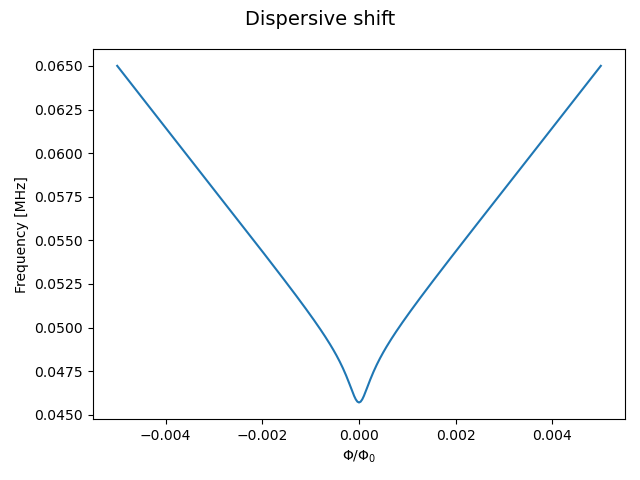

In [15]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
%matplotlib widget
fig,ax = plt.subplots(1,1)
fig.suptitle('Dispersive shift', fontsize = 14)
ax.plot(flux1_array,dispersive_shift*1e3)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [MHz]')
fig.tight_layout()
plt.show()

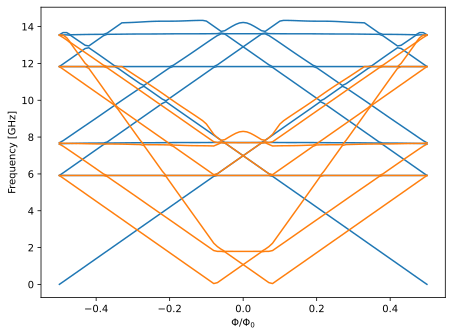

In [22]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline

fig,ax = plt.subplots(1,1)
ax.plot(flux1_array,transitions0, color='C0')
ax.plot(flux1_array,transitions1, color='C1')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()